# Fokker–Planck Equation

The **Fokker–Planck equation (FPE)** describes the time evolution of the probability density function (PDF) of a stochastic process.

In finance, it provides a probabilistic description for diffusive processes such as Brownian motion and stochastic differential equations (SDEs).

---

## General form

For a one-dimensional process $X(t)$ governed by:
$$
dX(t) = \mu(X, t) dt + \sigma(X, t) dW(t),
$$
the corresponding Fokker–Planck equation for the PDF $p(x, t)$ is:
$$
\frac{\partial p(x, t)}{\partial t} = -\frac{\partial}{\partial x} [\mu(x, t) p(x, t)] + \frac{1}{2} \frac{\partial^2}{\partial x^2} [\sigma^2(x, t) p(x, t)].
$$

---

## Special case: pure Brownian motion

For standard Brownian motion ($\mu = 0$, $\sigma = 1$):
$$
\frac{\partial p}{\partial t} = \frac{1}{2} \frac{\partial^2 p}{\partial x^2},
$$
which is simply the **heat equation**.

---

## Applications in quantitative finance

- Probabilistic interpretation of asset price diffusion.
- Link between SDEs and partial differential equations (PDEs).
- Foundation for option pricing PDEs (e.g., Black–Scholes equation).


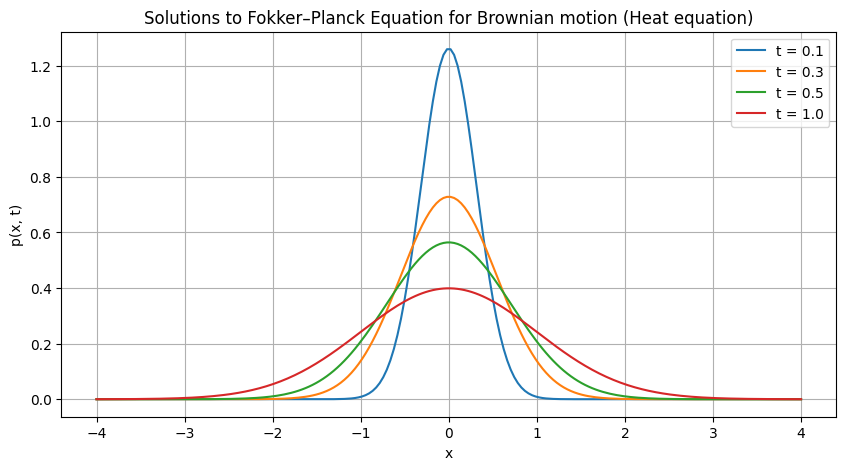

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
T = 1.0
N = 200
x = np.linspace(-4, 4, N)

# Analytical solution: PDF of Brownian motion at different times
times = [0.1, 0.3, 0.5, 1.0]

plt.figure(figsize=(10, 5))
for t_val in times:
    pdf = norm.pdf(x, loc=0, scale=np.sqrt(t_val))
    plt.plot(x, pdf, label=f't = {t_val:.1f}')
    
plt.title("Solutions to Fokker–Planck Equation for Brownian motion (Heat equation)")
plt.xlabel("x")
plt.ylabel("p(x, t)")
plt.legend()
plt.grid(True)
plt.show()

## Numerical Solution of Fokker–Planck Equation (Heat Equation Case)

We can solve the Fokker–Planck equation numerically using an explicit finite-difference scheme.

For Brownian motion:
$$
\frac{\partial p}{\partial t} = \frac{1}{2} \frac{\partial^2 p}{\partial x^2},
$$
which is equivalent to the heat equation with diffusion coefficient $D = 1/2$.


array([0.00000000e+00, 2.69425047e-30, 3.25517838e-29, 3.77238243e-28,
       4.21739879e-27, 4.54657021e-26, 4.72423210e-25, 4.72907531e-24,
       4.55827119e-23, 4.22839635e-22, 3.77282538e-21, 3.23614583e-20,
       2.66689238e-19, 2.11025614e-18, 1.60229981e-17, 1.16667048e-16,
       8.14058193e-16, 5.43954393e-15, 3.47821336e-14, 2.12673522e-13,
       1.24251257e-12, 6.93066639e-12, 3.68793143e-11, 1.87051629e-10,
       9.03522195e-10, 4.15273109e-09, 1.81450048e-08, 7.53028896e-08,
       2.96547053e-07, 1.10711640e-06, 3.91467972e-06, 1.30973872e-05,
       4.14227503e-05, 1.23719813e-04, 3.48632335e-04, 9.25998130e-04,
       2.31610790e-03, 5.45022762e-03, 1.20556331e-02, 2.50444495e-02,
       4.88228039e-02, 8.92457273e-02, 1.52859488e-01, 2.45160407e-01,
       3.67961777e-01, 5.16561946e-01, 6.77978850e-01, 8.31623149e-01,
       9.53090298e-01, 1.02037085e+00, 1.02037085e+00, 9.53090298e-01,
       8.31623149e-01, 6.77978850e-01, 5.16561946e-01, 3.67961777e-01,
      

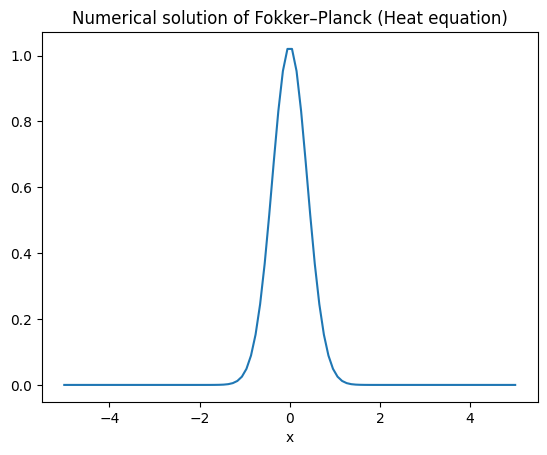

In [2]:
# Explicit finite-difference method for the heat equation

Nx = 100
Nt = 100
x_min, x_max = -5, 5
dx = (x_max - x_min) / Nx
dt = 0.0005  # small time step for stability

x_grid = np.linspace(x_min, x_max, Nx)
p = np.exp(-x_grid**2 / (2 * 0.1)) / np.sqrt(2 * np.pi * 0.1)  # initial Gaussian

p_new = np.zeros(Nx)
D = 0.5  # diffusion coefficient

for n in range(Nt):
    for i in range(1, Nx-1):
        p_new[i] = p[i] + D * dt / dx**2 * (p[i+1] - 2*p[i] + p[i-1])
    p[:] = p_new

plt.plot(x_grid, p)
plt.title("Numerical solution of Fokker–Planck (Heat equation)")
plt.xlabel("x")
p


## Time-Dependent Drift and Volatility: Ornstein–Uhlenbeck Process

The Fokker–Planck equation for the Ornstein–Uhlenbeck (OU) process:
$$
dX(t) = -\theta X(t) dt + \sigma dW(t)
$$
has a known analytical solution:
$$
p(x, t) = \frac{1}{\sqrt{2 \pi \sigma^2 (1 - e^{-2\theta t}) / (2\theta)}} 
\exp\left( -\frac{(x - X_0 e^{-\theta t})^2}{2 \sigma^2 (1 - e^{-2\theta t}) / (2\theta)} \right).
$$


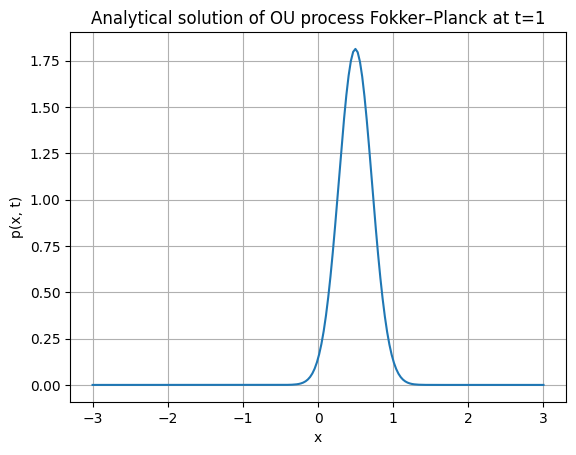

In [3]:
theta = 0.7
sigma = 0.3
X0 = 1.0
t_val = 1.0

variance = sigma**2 * (1 - np.exp(-2 * theta * t_val)) / (2 * theta)
mean = X0 * np.exp(-theta * t_val)

x = np.linspace(-3, 3, 200)
p = (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-(x - mean)**2 / (2 * variance))

plt.plot(x, p)
plt.title("Analytical solution of OU process Fokker–Planck at t=1")
plt.xlabel("x")
plt.ylabel("p(x, t)")
plt.grid(True)
plt.show()


## Empirical Calibration of PDF: Compare with FPE solution

Estimate the empirical PDF of asset returns and compare to analytical solution of Brownian motion Fokker–Planck equation (Gaussian density).


/var/folders/ry/7h2qkbms38q458j803wlq8c80000gp/T/ipykernel_1756/3582513408.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla = yf.download("TSLA", period="1y")
[*********************100%***********************]  1 of 1 completed
/Users/sinataamoli/Desktop/job/job/MarketAnalysis/quant/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


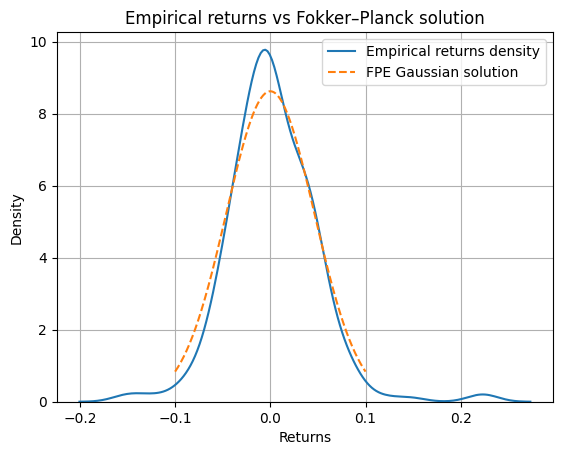

In [4]:
import yfinance as yf
import seaborn as sns
from scipy.stats import norm

tsla = yf.download("TSLA", period="1y")
returns = tsla['Close'].pct_change().dropna()

x_vals = np.linspace(-0.1, 0.1, 200)
pdf_theory = norm.pdf(x_vals, loc=0, scale=np.std(returns))

sns.kdeplot(returns, label="Empirical returns density")
plt.plot(x_vals, pdf_theory, label="FPE Gaussian solution", linestyle="--")
plt.title("Empirical returns vs Fokker–Planck solution")
plt.xlabel("Returns")
plt.legend()
plt.grid(True)
plt.show()


## Connection to Black–Scholes PDE

The famous Black–Scholes PDE can be derived directly from the Fokker–Planck equation governing the dynamics of asset prices under **Geometric Brownian Motion**.

We will cover this later in a dedicated notebook.


## Path Integral Interpretation

The Fokker–Planck equation solution can also be represented using **Feynman–Kac formula**, which connects stochastic processes to quantum mechanics path integrals.

This interpretation is not only mathematically elegant but leads to efficient numerical methods (e.g., Monte Carlo path simulation for option pricing).
